# Modelación y Simulación - Campos Vectoriales
## Inciso 5

**Authors:** [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt), [Daniel Valdez](https://github.com/Danval-003)

### Importaciones ⬇️

In [654]:
# Data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Standard libraries
import warnings
warnings.filterwarnings('ignore')

### Considere el siguiente problema de valor inicial


$$
\frac{dy}{dx} = \frac{x - 3y - 3(x^2 - y^2) + 3xy}{2x - y + 3(x^2 - y^2) + 2xy}

$$

$$
y(1.5) = 0
$$


Se diseña la función que gráfica el campo de direcciones pero utilizando la pendiente.

In [656]:
def getVectorFieldPendient(f, x_min, x_max, y_min, y_max, x_step, y_step, unitary_field=False, stream_lines=False):
    # Meshgrid 
    x, y = np.meshgrid(np.linspace(x_min, x_max, x_step),  
                       np.linspace(y_min, y_max, y_step))
    
    # Get vector field elements
    m = f(x, y)  # Compute dy/dx
    
    u = np.ones_like(m)  # Typically, u is constant in direction along x
    v = m  # dy/dx gives us the component along y

    # Normalize the vector field if unitary_field is True
    if unitary_field:
        magnitude = np.sqrt(u**2 + v**2)
        # Avoid division by zero
        magnitude[magnitude == 0] = 1
        u /= magnitude
        v /= magnitude

    # Plot
    fig, ax = plt.subplots()

    # Plotting vector field with Streamplot 
    if stream_lines:
        ax.streamplot(x, y, u, v, color='#C19EE0')
        
    # Plotting vector field with Quiver 
    ax.quiver(x, y, u, v, color='#313D5A', angles='xy')

    # Setting plot title 
    plt.title('Vector Field')

    # Setting x, y boundary limits 
    plt.xlim(x_min, x_max) 
    plt.ylim(y_min, y_max) 
    
    # Show plot with grid 
    plt.grid() 
    plt.show()


In [657]:
# Define the vector field function
def f(x, y):
    # Derivate of y
    y_prime = (x-3*y-3*(x**2 - y**2) + 3*x*y)/(2*x - y +3*(x**2 - y**2)+2*x*y)
    return y_prime

Graficar el campo de direcciones de la EDO anterior.


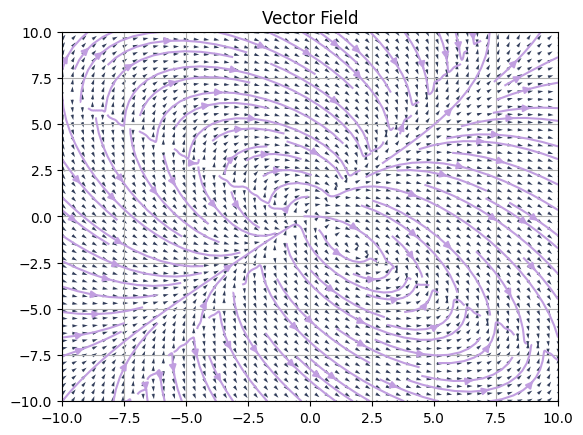

In [658]:
# Test
getVectorFieldPendient(f, x_min = -10, x_max = 10, y_min = -10, y_max = 10,
                x_step = 50, y_step = 50 ,unitary_field=True , stream_lines = True)

In [659]:

from scipy.integrate import solve_ivp

def getVectorFieldPendientWithPoint(f, x_min, x_max, y_min, y_max, x_step, y_step, unitary_field=False, stream_lines=False, init_conditions=None):
    # Meshgrid 
    x, y = np.meshgrid(np.linspace(x_min, x_max, x_step),  
                       np.linspace(y_min, y_max, y_step))
    
    # Get vector field elements
    m = f(x, y)  # Compute dy/dx
    
    u = np.ones_like(m)  # Typically, u is constant in direction along x
    v = m  # dy/dx gives us the component along y

    # Normalize the vector field if unitary_field is True
    if unitary_field:
        magnitude = np.sqrt(u**2 + v**2)
        # Avoid division by zero
        magnitude[magnitude == 0] = 1
        u /= magnitude
        v /= magnitude

    # Plot
    fig, ax = plt.subplots()

    # Plotting vector field with Streamplot 
    if stream_lines:
        ax.streamplot(x, y, u, v, color='#C19EE0')
        
    # Plotting vector field with Quiver 
    ax.quiver(x, y, u, v, color='#313D5A', angles='xy')

    # Plot the solution curve if initial conditions are provided
    if init_conditions is not None:
        def ode_system(t, y):
            # dy/dt = f(t, y)
            return [f(t, y[0])]  # ODE: dy/dx = f(x, y)

        # Solve the ODE
        t_span = [init_conditions[0], init_conditions[0] + 10]  # Define the interval for t
        sol = solve_ivp(ode_system, t_span, [init_conditions[1]], t_eval=np.linspace(init_conditions[0], init_conditions[0] + 10, 500))

        # Plot the solution curve
        ax.plot(sol.t, sol.y[0], 'r-', label='Solution Curve')

    # Setting plot title 
    plt.title('Vector Field with Solution Curve')

    # Setting x, y boundary limits 
    plt.xlim(x_min, x_max) 
    plt.ylim(y_min, y_max) 
    
    # Show plot with grid 
    plt.grid() 
    plt.legend()
    plt.show()

A partir del campo de direcciones, esbozar la solución del problema de valor inicial (3), y agregar la curva soluci´on al
plot del campo de direcciones.


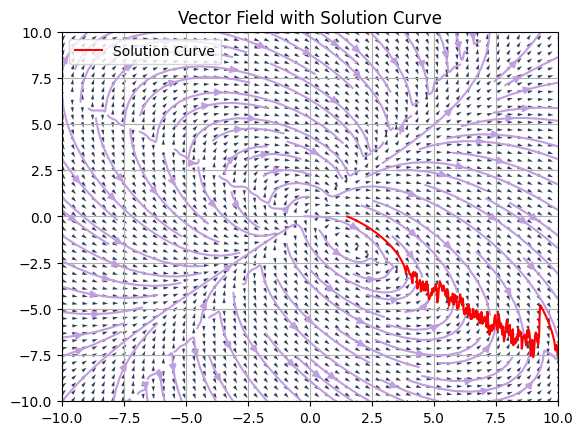

In [662]:
# Test
getVectorFieldPendientWithPoint(f, x_min = -10, x_max = 10, y_min = -10, y_max = 10,
                x_step = 50, y_step = 50, unitary_field=True, stream_lines = True, init_conditions=(1.5, 0))